<a href="https://colab.research.google.com/github/rohithreddy1229/projects/blob/main/Fashion_MNIST_Data_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST Data Classification Project

# step 1: Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

# step 2: Load Data

In [ ]:
(X_train, y_train), (X_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# print the shape of data

In [ ]:
X_train.shape,y_train.shape, "**********" ,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), '**********', (10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels=["T-shirt/top"
,	"Trouser"
,	"Pullover"
,	"Dress"
,	"Coat"
,	"Sandal"
,	"Shirt"
,	"Sneaker"
,	"Bag"
,	"Ankle boot"
]

In [ ]:
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# show image

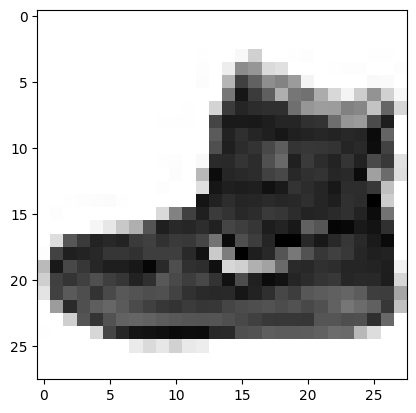

In [ ]:
plt.imshow(X_train[0],cmap='Greys')

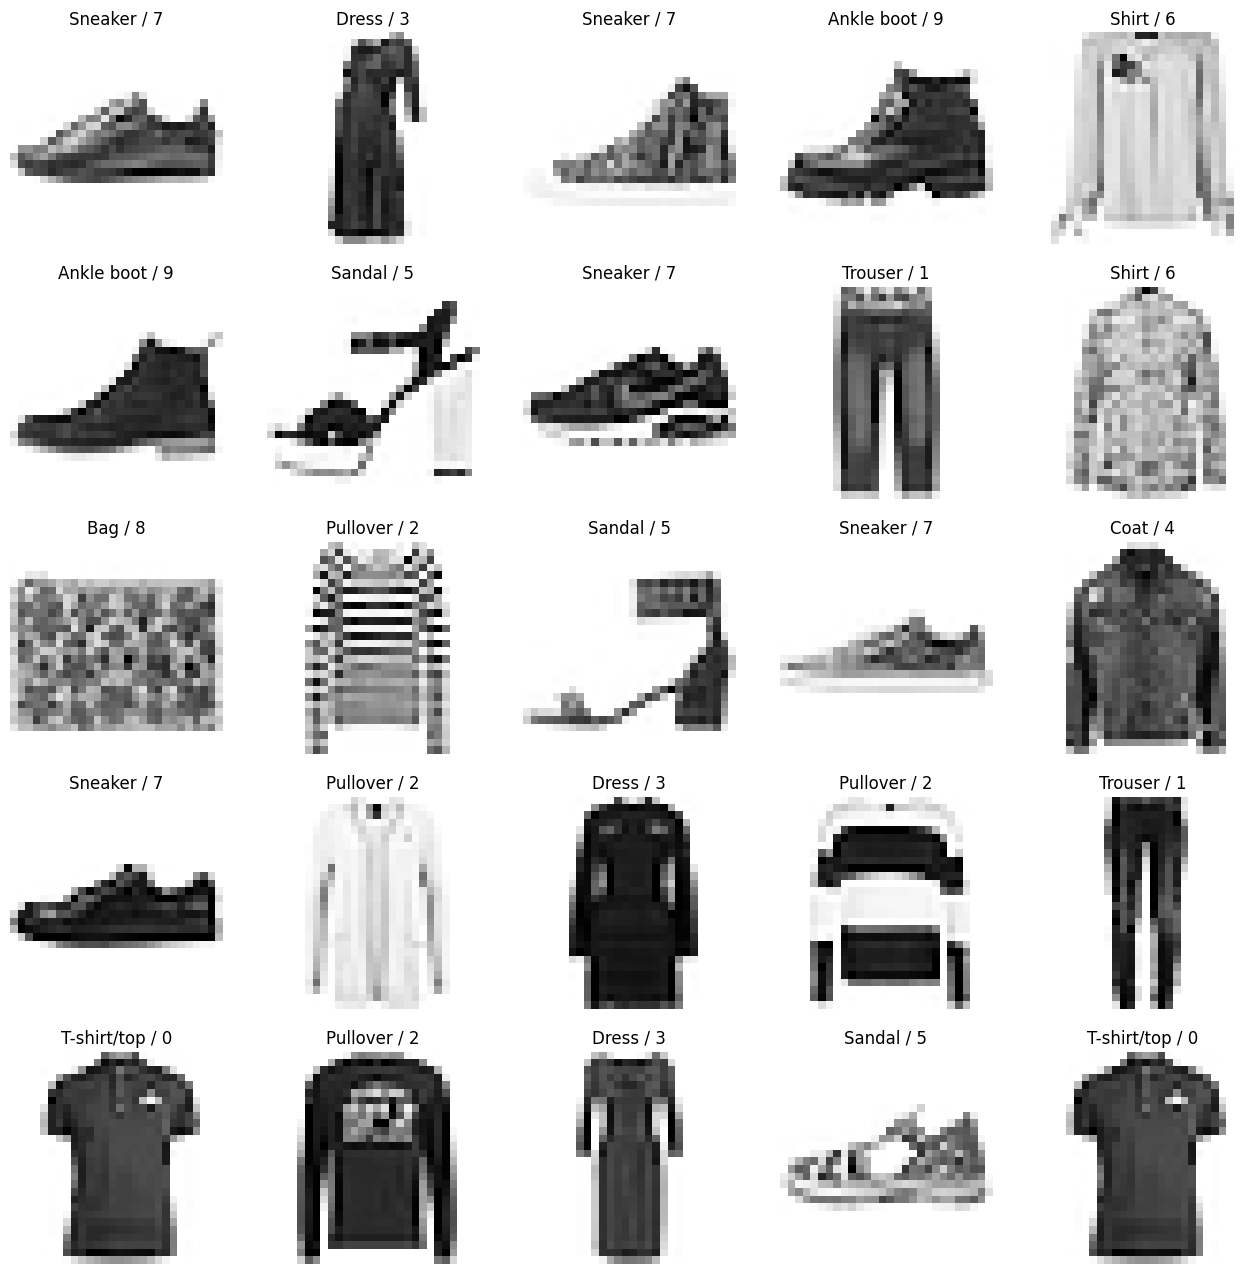

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);
  j+=1;
  plt.imshow(X_train[i],cmap='Greys')
  plt.axis('off')
  plt.title('{} / {}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
X_train.ndim

3

In [ ]:
X_train= np.expand_dims(X_train,-1)

In [ ]:
X_train.ndim

4

In [ ]:
X_test=np.expand_dims(X_test,-1)

In [ ]:
#feature scalling

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
#split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(X_train,y_train,test_size=0.2,random_state=2020)

In [ ]:
X_train.shape,X_validation.shape,y_train.shape,y_validation.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000,), (12000,))

# step 3: Building the CNN model

In [ ]:
model=keras.models.Sequential([
            keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
            keras.layers.MaxPooling2D(pool_size=(2,2)),
            keras.layers.Flatten(),
            keras.layers.Dense(units=128,activation='relu'),
            keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,y_validation))

Epoch 1/10
94/94 [==============================] - 29s 299ms/step - loss: 0.6166 - accuracy: 0.7899 - val_loss: 0.4487 - val_accuracy: 0.8347
Epoch 2/10
94/94 [==============================] - 28s 294ms/step - loss: 0.3708 - accuracy: 0.8699 - val_loss: 0.3652 - val_accuracy: 0.8754
Epoch 3/10
94/94 [==============================] - 27s 284ms/step - loss: 0.3293 - accuracy: 0.8840 - val_loss: 0.3344 - val_accuracy: 0.8837
Epoch 4/10
94/94 [==============================] - 27s 284ms/step - loss: 0.2945 - accuracy: 0.8964 - val_loss: 0.3110 - val_accuracy: 0.8935
Epoch 5/10
94/94 [==============================] - 27s 285ms/step - loss: 0.2746 - accuracy: 0.9023 - val_loss: 0.3043 - val_accuracy: 0.8917
Epoch 6/10
94/94 [==============================] - 27s 292ms/step - loss: 0.2578 - accuracy: 0.9076 - val_loss: 0.2976 - val_accuracy: 0.8951
Epoch 7/10
94/94 [==============================] - 27s 291ms/step - loss: 0.2433 - accuracy: 0.9130 - val_loss: 0.2794 - val_accuracy: 0.9034

In [ ]:
y_pred=model.predict(X_test)
y_pred.round(2)

313/313 [==============================] - 2s 7ms/step


array([[0.  , 0.  , 0.  , ..., 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.99, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.09, 0.04, 0.  ]], dtype=float32)

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2721 - accuracy: 0.8999


[0.27211010456085205, 0.8999000191688538]

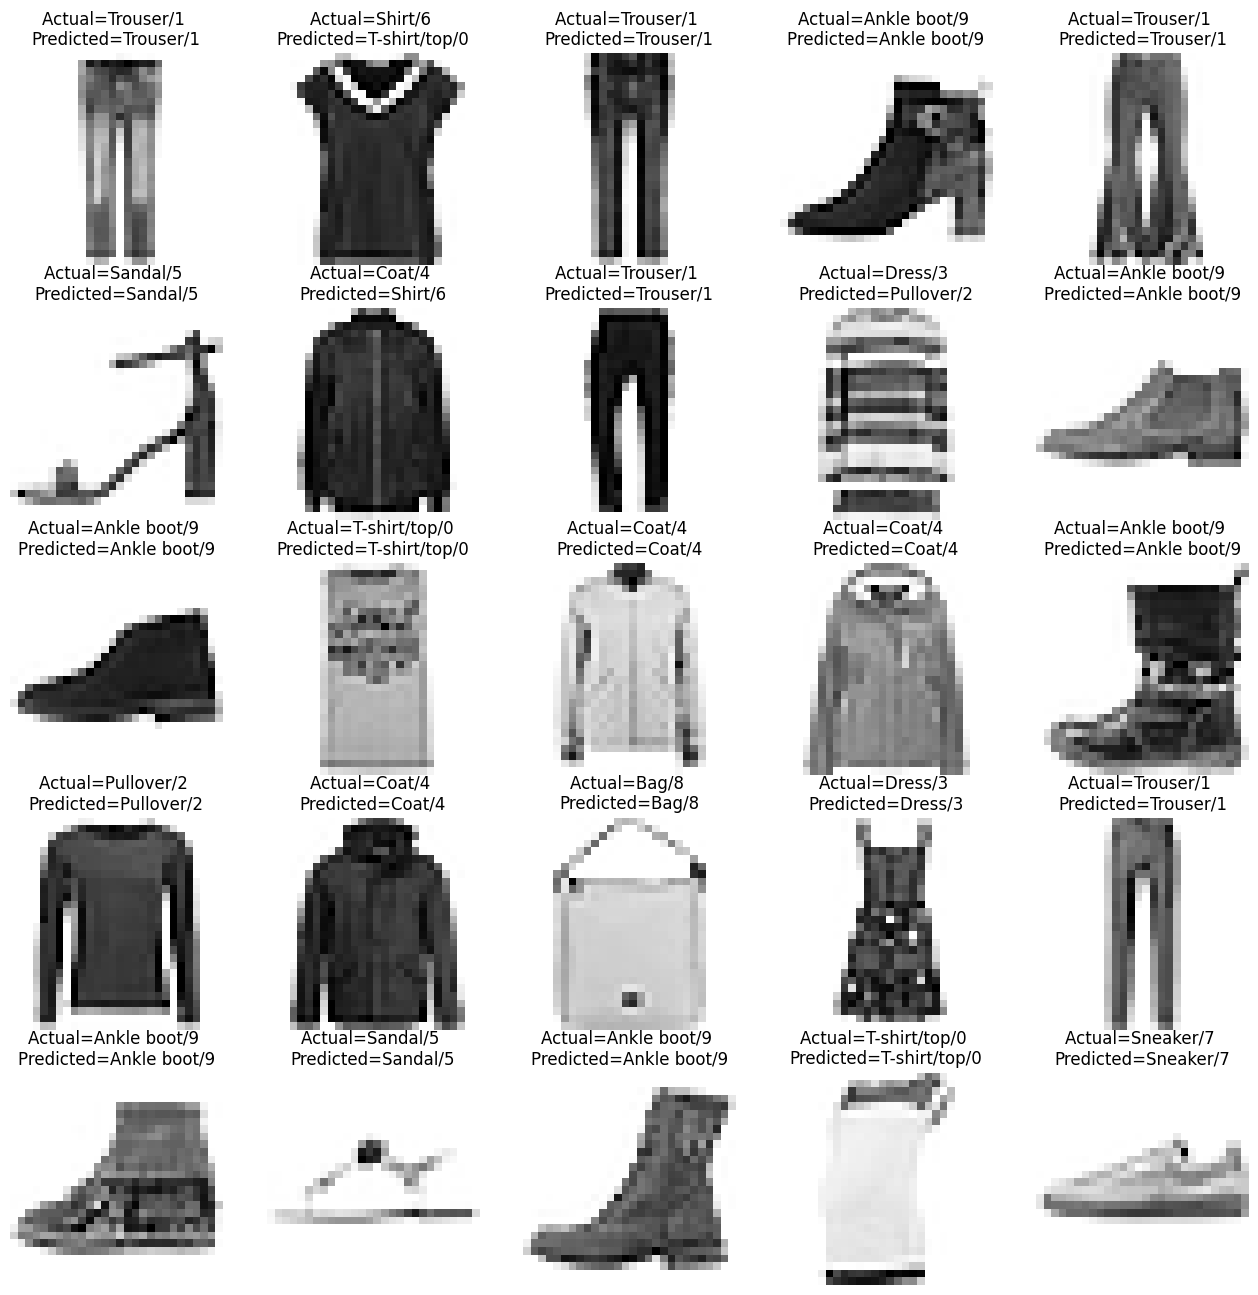

In [ ]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={}/{} \nPredicted={}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

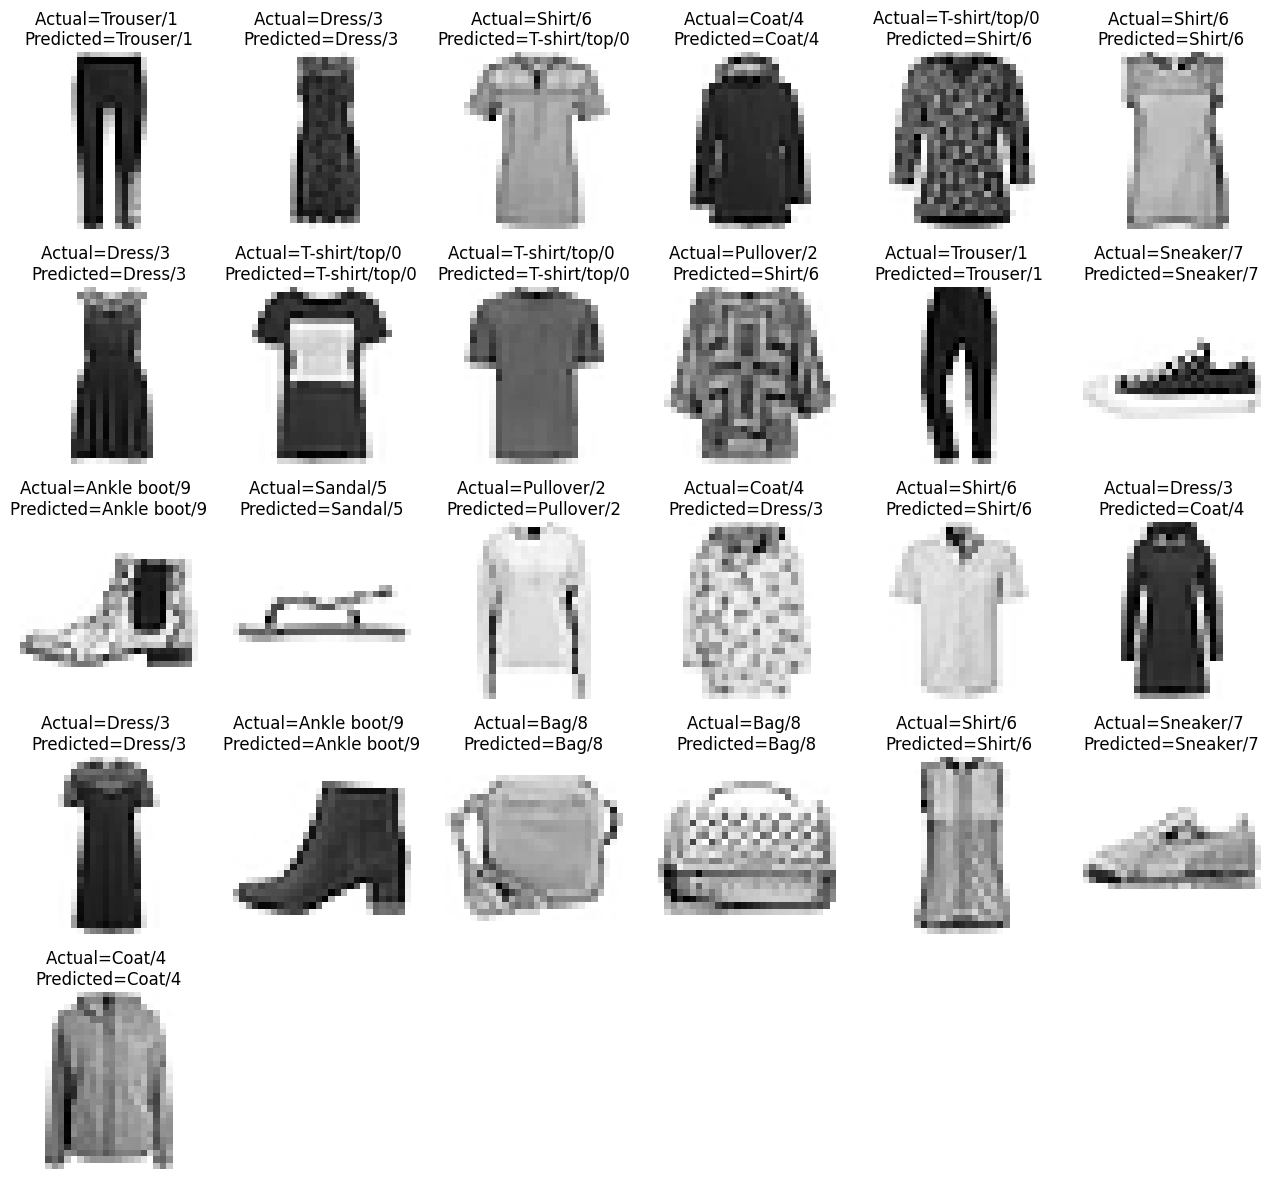

In [ ]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(1000,2000,25):
  plt.subplot(10,6,j);j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap='Greys')
  plt.title('Actual={}/{} \nPredicted={}/{}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [ ]:
"""##confusion matrix"""

'##confusion matrix'

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)

<Figure size 1600x900 with 0 Axes>

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.81      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.83      0.86      0.84      1000
       Dress       0.89      0.93      0.91      1000
        Coat       0.87      0.80      0.83      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.70      0.76      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



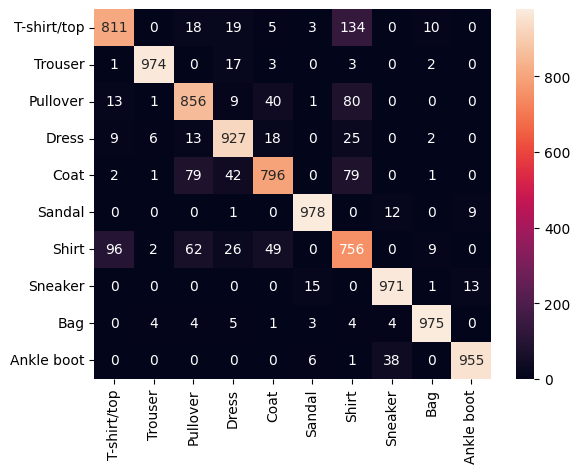

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_labels,yticklabels=class_labels)

from sklearn.metrics import classification_report
cr= classification_report(y_test,y_pred_labels,target_names=class_labels)
print(cr)